In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pptoolbox.utils import preprocess, WAVELENGTHS_3NM_V1
from pptoolbox.visualization import initialize_theme

cmaps = initialize_theme()

Registered profileprint_light_cmap
Registered profileprint_diverging_cmap


In [ ]:
# df = pd.read_csv(f'../data/raw/{nb_id}/input.csv', index_col=0)
df = pd.read_csv(f'../data/raw/spectra_250210.csv')

df.head()

,lot_id,specimen_id,lot_name,date_scanned,analyser_id,company_id,product_id,product_name,raw_data,dark_ref_data,white_ref_data,dark_ref_scan_time,white_ref_scan_time
0,78500,470951,06924GOL7A,1727790925,72,1243,6579,Cocoa Butter,"[{""wavelength"": 336.2986755371094, ""reflectanc...","[117.8205, 117.8785625, 113.0476875, 116.91393...","[118.012, 117.7645625, 113.35925, 116.723625, ...",1727790792,1727790833
1,78500,470952,06924GOL7A,1727790942,72,1243,6579,Cocoa Butter,"[{""wavelength"": 336.2986755371094, ""reflectanc...","[117.8205, 117.8785625, 113.0476875, 116.91393...","[118.012, 117.7645625, 113.35925, 116.723625, ...",1727790792,1727790833
2,78500,470953,06924GOL7A,1727790959,72,1243,6579,Cocoa Butter,"[{""wavelength"": 336.2986755371094, ""reflectanc...","[117.8205, 117.8785625, 113.0476875, 116.91393...","[118.012, 117.7645625, 113.35925, 116.723625, ...",1727790792,1727790833
3,78500,470954,06924GOL7A,1727790975,72,1243,6579,Cocoa Butter,"[{""wavelength"": 336.2986755371094, ""reflectanc...","[117.8205, 117.8785625, 113.0476875, 116.91393...","[118.012, 117.7645625, 113.35925, 116.723625, ...",1727790792,1727790833
4,78500,470955,06924GOL7A,1727791033,72,1243,6579,Cocoa Butter,"[{""wavelength"": 336.2986755371094, ""reflectanc...","[117.8205, 117.8785625, 113.0476875, 116.91393...","[118.012, 117.7645625, 113.35925, 116.723625, ...",1727790792,1727790833


In [3]:
# spectra = pd.read_csv(f'../data/raw/{nb_id}/spectra.csv', index_col=0)

spectra,_ = preprocess(df, wavelengths=WAVELENGTHS_3NM_V1)
spectra.head()

,480.0,483.0,486.0,489.0,492.0,495.0,498.0,501.0,504.0,507.0,...,1023.0,1026.0,1029.0,1032.0,1035.0,1038.0,1041.0,1044.0,1047.0,1050.0
lot_id,,,,,,,,,,,,,,,,,,,,,
69163,6.145573,6.198204,6.330278,6.566707,6.967829,7.529636,8.326513,9.319314,10.486633,11.698236,...,31.120152,31.145146,30.995595,30.761466,30.654638,30.640343,30.676417,30.955769,31.150037,31.360990
69163,6.173855,6.220820,6.343865,6.585994,6.964867,7.542146,8.326181,9.314073,10.473370,11.695729,...,31.235503,31.236838,31.110689,30.866465,30.759961,30.756338,30.817221,31.088920,31.292452,31.517537
69163,6.140499,6.176013,6.316024,6.538237,6.923945,7.483661,8.267181,9.261267,10.422132,11.641686,...,31.174530,31.173739,31.020865,30.803984,30.689510,30.686345,30.711815,31.009770,31.162069,31.429265
69163,6.131834,6.168246,6.310047,6.535069,6.912344,7.476733,8.263347,9.255818,10.417853,11.642845,...,31.339015,31.353955,31.238794,31.001924,30.879137,30.863135,30.896236,31.196969,31.385079,31.665443
69163,6.175043,6.223517,6.349118,6.562475,6.945281,7.492338,8.283008,9.265989,10.428904,11.642429,...,31.247490,31.294828,31.176954,30.942907,30.806447,30.806106,30.847073,31.148551,31.323740,31.599838


In [4]:
df = df.set_index('lot_id')

In [5]:
from pptoolbox.preprocessing import SNV
from sklearn.decomposition import PCA

In [6]:
spectra_snv = SNV().fit_transform(spectra)
spectra_snv = pd.DataFrame(spectra_snv, index=spectra.index, columns=spectra.columns)

In [7]:
pca = PCA(n_components=2)
scores = pca.fit_transform(spectra_snv)
scores = pd.DataFrame(scores, index=spectra.index, columns=['PC1', 'PC2'])
scores = scores.join(df.loc[:, ['lot_name']]).drop_duplicates()
scores.head()

,PC1,PC2,lot_name
lot_id,,,
69163,-0.189089,-0.399561,MRKU8144625
69163,-0.168261,-0.374192,MRKU8144625
69163,-0.185625,-0.400081,MRKU8144625
69163,-0.172249,-0.379645,MRKU8144625
69163,-0.168937,-0.360597,MRKU8144625


### Each Lot Report

In [8]:
wavelengths = np.array(WAVELENGTHS_3NM_V1)
full_mask = (wavelengths >= 400) & (wavelengths <= 1050)
vis_mask = (wavelengths >= 480) & (wavelengths <= 750)
nir_mask = (wavelengths > 750) & (wavelengths <= 1050)
mask01 = (wavelengths >= 480) & (wavelengths < 550)
mask02 = (wavelengths >= 550) & (wavelengths < 650)
mask03 = (wavelengths >= 650) & (wavelengths < 750)
mask04 = (wavelengths >= 750) & (wavelengths < 850)
mask05 = (wavelengths >= 850) & (wavelengths < 950)
mask06 = (wavelengths >= 950) & (wavelengths <= 1050)

masks = [full_mask, vis_mask, nir_mask, mask01, mask02, mask03, mask04, mask05, mask06]
titles = ['Full Spectrum', 'Visible Spectrum', 'NIR Spectrum', '480-550 nm', '550-650 nm', '650-750 nm', '750-850 nm', '850-950 nm', '950-1050 nm']

def get_corr_scores(spectra: pd.DataFrame, masks: list = masks):
    mean_corr_scores = []
    for i, mask in enumerate(masks):
        corr_scores = spectra.loc[:, mask].T.corr()
        corr_scores = np.triu(corr_scores.values, 1)
        corr_scores = corr_scores.flatten()
        corr_scores = corr_scores[corr_scores != 0]
        mean_corr = np.mean(corr_scores)
        mean_corr_scores.append(mean_corr)
    return mean_corr_scores

In [9]:
import tqdm

In [10]:
save_dir = f'../reports/figures/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
combined_corr_scores = pd.DataFrame(index=spectra_snv.index.unique(), columns=titles)
for lot_id in tqdm.tqdm(spectra_snv.index.unique()):
    selected_spectra = spectra_snv.loc[lot_id]
    if len(selected_spectra) == 191:
        print('Skipped:', lot_id)
        continue
    
    mean_corr_scores = get_corr_scores(selected_spectra)
    
    fig = plt.figure(figsize=(10, 6))
    gs = plt.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1])

    ax1 = fig.add_subplot(gs[0, 0])
    selected_spectra.T.plot(legend=False, ax=ax1, title='SNV Spectra')
    
    ax2 = fig.add_subplot(gs[1, 0])
    selected_spectra.var().plot(ax=ax2, title='Spectra Variance')
    
    ax3 = fig.add_subplot(gs[:, 1])
    sns.barplot(x=mean_corr_scores, y=titles, ax=ax3)
    for i, mean_corr in enumerate(mean_corr_scores):
        ax3.text(mean_corr, i, f'{mean_corr:.2f}', va='center')
    ax3.axvline(0.9, color='red', linestyle='--')
    ax3.set_xlim(min(mean_corr_scores) - 0.05, max(mean_corr_scores) + 0.05);
    ax3.set_title('Mean Correlation Coefficient of Spectra Segments')
    
    plt.suptitle(f'Lot ID: {lot_id} | Lot Name: {df.loc[lot_id, "lot_name"].unique()[0]}')
    plt.tight_layout()
    plt.savefig(f'{save_dir}/{lot_id}.png', dpi=300)
    plt.close()
    
    combined_corr_scores.loc[lot_id] = mean_corr_scores

100%|██████████| 729/729 [12:09<00:00,  1.00s/it]


In [11]:
combined_corr_scores.head()

,Full Spectrum,Visible Spectrum,NIR Spectrum,480-550 nm,550-650 nm,650-750 nm,750-850 nm,850-950 nm,950-1050 nm
lot_id,,,,,,,,,
69163,0.999996,0.999999,0.999965,0.999994,0.999997,0.999993,0.999309,0.999971,0.999492
69164,0.999994,0.999999,0.999972,0.999985,0.999998,0.999995,0.99988,0.999966,0.9994
69165,0.999992,0.999988,0.999983,0.99995,0.999996,0.999979,0.999232,0.999969,0.999759
69166,0.999997,0.999997,0.999982,0.999989,0.999997,0.999982,0.999011,0.999978,0.999487
69169,0.999993,0.999994,0.999969,0.999977,0.999996,0.999971,0.998108,0.999975,0.999556


In [12]:
combined_corr_scores.to_csv(f'../reports/combined_corr_scores.csv')

In [13]:
combined_corr_scores[combined_corr_scores < 0.9].dropna(how='all')

,Full Spectrum,Visible Spectrum,NIR Spectrum,480-550 nm,550-650 nm,650-750 nm,750-850 nm,850-950 nm,950-1050 nm
lot_id,,,,,,,,,
88479,NaN,NaN,NaN,NaN,NaN,NaN,0.597803,NaN,NaN


Text(0.5, 1.0, 'SNV-PCA Scores')

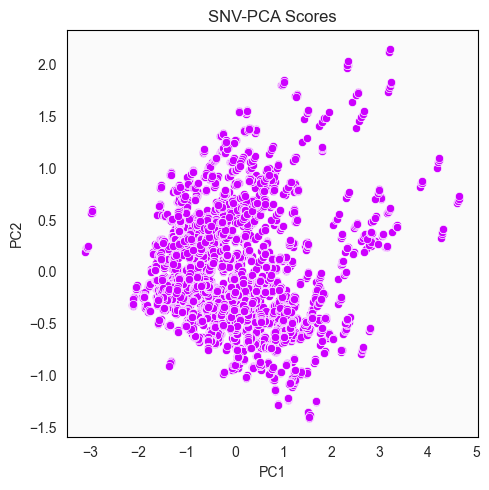

In [14]:
f, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.scatterplot(data=scores.reset_index(), x='PC1', y='PC2')
plt.title('SNV-PCA Scores')

### Look at the results

In [15]:
combined_corr_scores = pd.read_csv(f'../reports/combined_corr_scores.csv', index_col=0)
combined_corr_scores

,Full Spectrum,Visible Spectrum,NIR Spectrum,480-550 nm,550-650 nm,650-750 nm,750-850 nm,850-950 nm,950-1050 nm
lot_id,,,,,,,,,
69163,0.999996,0.999999,0.999965,0.999994,0.999997,0.999993,0.999309,0.999971,0.999492
69164,0.999994,0.999999,0.999972,0.999985,0.999998,0.999995,0.999880,0.999966,0.999400
69165,0.999992,0.999988,0.999983,0.999950,0.999996,0.999979,0.999232,0.999969,0.999759
69166,0.999997,0.999997,0.999982,0.999989,0.999997,0.999982,0.999011,0.999978,0.999487
69169,0.999993,0.999994,0.999969,0.999977,0.999996,0.999971,0.998108,0.999975,0.999556
...,...,...,...,...,...,...,...,...,...
89370,0.999997,0.999999,0.999954,0.999997,0.999997,0.999996,0.999393,0.999978,0.999186
89371,0.999999,0.999999,0.999989,0.999996,0.999998,0.999995,0.999085,0.999981,0.999823
89372,0.999999,0.999999,0.999990,0.999997,0.999998,0.999997,0.999801,0.999981,0.999780


In [16]:
outs = combined_corr_scores[combined_corr_scores < 0.9].dropna(how='all')
outs.head()

,Full Spectrum,Visible Spectrum,NIR Spectrum,480-550 nm,550-650 nm,650-750 nm,750-850 nm,850-950 nm,950-1050 nm
lot_id,,,,,,,,,
88479,NaN,NaN,NaN,NaN,NaN,NaN,0.597803,NaN,NaN


<Axes: title={'center': 'Coca Cola - Apple Concentrate Clear'}, xlabel='Percentage of Lots Failed in this Region (%)'>

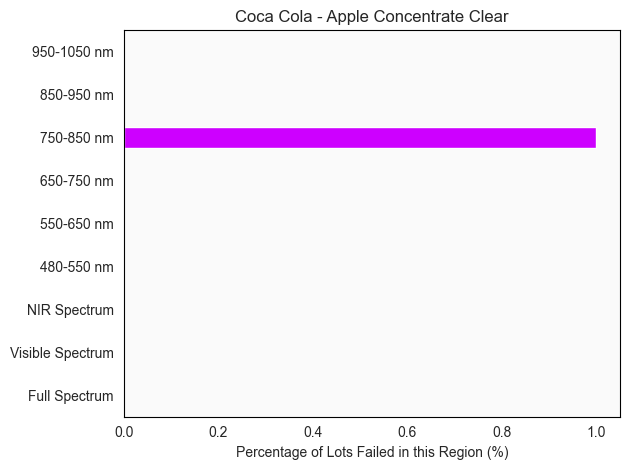

In [17]:
(outs.notna().sum()/outs.shape[0]).plot(kind='barh', xlabel='Percentage of Lots Failed in this Region (%)',
                                        title='Coca Cola - Apple Concentrate Clear')

In [18]:
in_lots = combined_corr_scores[~combined_corr_scores.index.isin(outs.index)].index
in_lots

Int64Index([69163, 69164, 69165, 69166, 69169, 69170, 69171, 69172, 69173,
            69174,
            ...
            88493, 88494, 88495, 88496, 88497, 89370, 89371, 89372, 89373,
            89656],
           dtype='int64', name='lot_id', length=728)